# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Kami

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [57]:
import requests
import pickle

# Get the webpage
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
response = requests.get(url)

# Save the HTML to a pickle file
with open('article.pkl', 'wb') as f:
    pickle.dump(response.text, f)

print("Article HTML saved to article.pkl")

Article HTML saved to article.pkl


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [58]:
from bs4 import BeautifulSoup

# Read the HTML from the pickle file
with open('article.pkl', 'rb') as f:
    html_content = pickle.load(f)

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract and print the text
article_text = soup.get_text()
print(article_text)

















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [59]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter

# Load the spaCy model and add the SpacyTextBlob pipeline component
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_text)

# Function to determine if we care about a token
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# Extract interesting tokens and their frequencies
interesting_tokens = [token.text.lower() for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))

# Print with an appropriate label
print("The most common words (and their count) in the article are:")
for i, (word, freq) in enumerate(word_freq.most_common(5), start=1):
    print(f"{i}. {word} ({freq})")

The most common words (and their count) in the article are:
1. comment (136)
2. march (133)
3. 2021 (133)
4. says (132)
5. report (130)


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [60]:
# Extract interesting lemmas and their frequencies
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)

# Print with an appropriate label
print("The most common lemmas (and their count) in the article are:")
for i, (lemma, freq) in enumerate(lemma_freq.most_common(5), start=1):
    print(f"{i}. {lemma} ({freq})")

The most common lemmas (and their count) in the article are:
1. comment (157)
2. say (134)
3. march (133)
4. 2021 (133)
5. report (130)


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [61]:
# Define score_sentence_by_token
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Takes a sentence and a list of interesting tokens and returns the
    number of times that any of the interesting words appear in the sentence
    dividided by the number of words in the sentence.
    """
    words = sentence.split()
    if not words:
        return 0
    interesting_count = sum(1 for word in words if word.lower() in interesting_tokens)
    return interesting_count / len(words)

# Test the score_sentence_by_token with the first sentence of the article
first_sentence = soup.find('p').get_text()
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
print(f"The token score for the first sentence is: {token_score:.2f}")

# Define score_sentence_by_lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Takes a sentence and a list of interesting lemmas and returns the
    number of times that any of the interesting lemmas appear in the sentence
    divided by the number of words in the sentence.
    """
    words = sentence.split()
    if not words:
        return 0
    interesting_count = sum(1 for word in words if word.lower() in interesting_lemmas)
    return interesting_count / len(words)

# Test the score_sentence_by_lemma with the first sentence of the article
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)
print(f"The lemma score for the first sentence is: {lemma_score:.2f}")


The token score for the first sentence is: 0.39
The lemma score for the first sentence is: 0.39


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

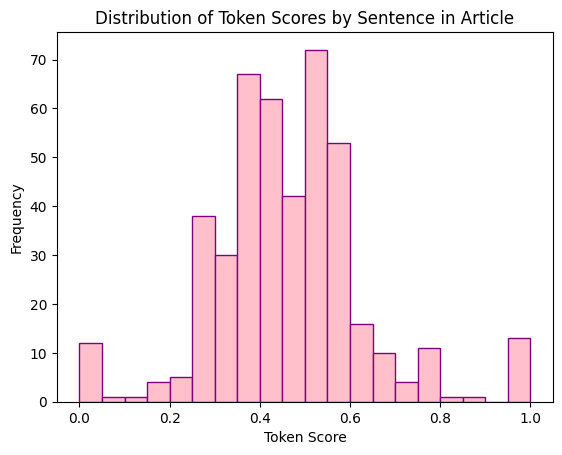

In [62]:
import matplotlib.pyplot as plt

# Make a list of the scores (using the token score) of each sentence in the article
def get_sentences(text):
    """
    Splits the text into sentences.
    """
    return [sentence.strip() for sentence in text.split('.') if sentence]

sentences = get_sentences(article_text)

# use function score_sentence_by_token to get the scores
scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]

# plot histogram of the scores of sentences
plt.hist(scores, bins=20, edgecolor='purple', color="pink")
plt.title('Distribution of Token Scores by Sentence in Article')
plt.xlabel('Token Score')
plt.ylabel('Frequency')
plt.show()

# The most common range of scores appears to be between 0.35 and 0.55.
# The highest range of scores is between 0.5 to 0.55.

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

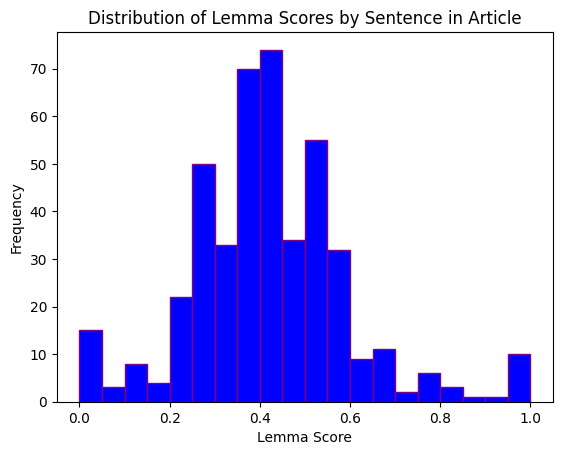

In [63]:
# use function score_sentence_by_lemma to get the scores
scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

# plot histogram of the scores of sentences
plt.hist(scores, bins=20, edgecolor='purple', color="blue")
plt.title('Distribution of Lemma Scores by Sentence in Article')
plt.xlabel('Lemma Score')
plt.ylabel('Frequency')
plt.show()

# The highest range of scores is between 0.35 and 0.45.

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

ANSWER:
*If we only considered nouns as interesting words, verbs like comment, say, and report, as well as numbers like 2021, would be omitted. These tokens are not nouns and would be excluded along with other non-noun parts of speech and stop words. To modify the code, we would update the we_care_about() function to include a condition that filters for tokens where token.pos_ is "NOUN" or "PROPN", ensuring only nouns and proper nouns are counted.*